In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import statsmodels.api as sm


import matplotlib.pyplot as plt
import seaborn as sns

1. Загрузка и подготовка данных

In [2]:
allarticles_df = pd.read_csv('/Users/evgeniapervuhina/postgres_public_articles_allarticles.csv')
articles_df = pd.read_csv('/Users/evgeniapervuhina/postgres_public_articles_articles.csv')
statistics_df = pd.read_csv('/Users/evgeniapervuhina/postgres_public_articles_statistics.csv')
users_df = pd.read_csv('/Users/evgeniapervuhina/postgres_public_users_user1.csv')

In [3]:
allarticles_df.head()

,#,id,created_at,is_download,is_user_source,article_id,user_id
0,1,7601,2023-07-10 05:37:08.987593 +00:00,False,False,3787,669143578
1,2,7603,2023-07-10 05:40:05.510257 +00:00,False,False,3791,669143578
2,3,7604,2023-07-10 05:40:25.496306 +00:00,False,False,3793,669143578
3,4,7605,2023-07-10 05:40:38.345101 +00:00,True,False,3794,669143578
4,5,7606,2023-07-10 05:44:35.284912 +00:00,False,False,3797,669143578


In [4]:
allarticles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46100 entries, 0 to 46099
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   #               46100 non-null  int64 
 1   id              46100 non-null  int64 
 2   created_at      46100 non-null  object
 3   is_download     46100 non-null  bool  
 4   is_user_source  46100 non-null  bool  
 5   article_id      46100 non-null  int64 
 6   user_id         46100 non-null  int64 
dtypes: bool(2), int64(4), object(1)
memory usage: 1.8+ MB


In [5]:
allarticles_df['created_at'] = pd.to_datetime(allarticles_df['created_at'])\
                                .dt.strftime('%Y-%m-%d %H')
articles_df[['created_at','updated_at']] = articles_df[['created_at','updated_at']]\
                                .apply(lambda x: pd.to_datetime((x)).dt.strftime('%Y-%m-%d %H:%M'))
statistics_df['created_at'] = pd.to_datetime(statistics_df['created_at'])\
                                .dt.strftime('%Y-%m-%d %H:%M')

In [6]:
articles_df.head()

,#,created_at,updated_at,article_id,uuid,doi,title,type,author,container_title,date,ISSN,page,volume,issue
0,1,1900-01-01 00:00,1900-01-01 00:00,7572,0c64cc1f-7099-412f-8267-3eece72bffed,10.1016/0020-7683(94)90054-x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1900-01-01 00:00,1900-01-01 00:00,55,e8c3bf0e-1f12-49b3-a170-d0611ab76bdd,10.36622/vstu.2021.85.3.007,APPLICATION OF NEURAL NETWORK TECHNOLOGIES FOR...,journal-article,"В.Г. Благовещенский, А.Е. Краснов, Е.И. Бажено...",СИСТЕМЫ УПРАВЛЕНИЯ И ИНФОРМАЦИОННЫЕ ТЕХНОЛОГИИ,2021.0,1729-5068,37-41,NaN,3(85)
2,3,1900-01-01 00:00,1900-01-01 00:00,62,a2157814-f9f5-40c0-88b7-306a21d51414,10.36910/6775-2310-5283-2018-11-21,ОГЛЯД ВИДІВ ФІБР ДЛЯ ДИСПЕРСНО-АРМОВАНИХ БЕТОНІВ,journal-article,Editor Editor,Товарознавчий вісник,2019.0,2310-5283,183-191,1,11
3,4,1900-01-01 00:00,1900-01-01 00:00,36,2241fca9-fbe9-4326-be44-5734498aec5f,10.48550/arxiv.1906.11078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1900-01-01 00:00,1900-01-01 00:00,6,d4adbeb5-e757-43be-a735-f995fd1d3783,10.1080/0907676x.2002.9961449,Technical translation and related disciplines,journal-article,Geoffrey Kingscott,Perspectives,2012.0,"0907-676X, 1747-6623",247-255,10,4


In [7]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39174 entries, 0 to 39173
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                39174 non-null  int64  
 1   created_at       39174 non-null  object 
 2   updated_at       39174 non-null  object 
 3   article_id       39174 non-null  int64  
 4   uuid             39174 non-null  object 
 5   doi              39174 non-null  object 
 6   title            37488 non-null  object 
 7   type             37493 non-null  object 
 8   author           36574 non-null  object 
 9   container_title  37494 non-null  object 
 10  date             37494 non-null  float64
 11  ISSN             32340 non-null  object 
 12  page             30629 non-null  object 
 13  volume           29013 non-null  object 
 14  issue            23724 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 4.5+ MB


In [8]:
statistics_df.head()

,#,id,user_count,active_24,new_users_24,all_query,all_query_24,founded,founded_24,count_downloads,install,install_24,unfounded,unfounded_24,created_at
0,1,1,6081,88,21,10027,123,3159,57,3237,5,0,6868,66,2023-08-21 22:27
1,2,2,6107,87,26,10152,125,3454,46,3285,5,0,6698,79,2023-08-22 22:27
2,3,3,6133,98,26,10271,119,3476,22,3310,5,0,6795,97,2023-08-23 22:27
3,4,4,6147,73,14,10345,74,3489,13,3324,5,0,6856,61,2023-08-24 22:27
4,5,5,6166,66,19,10417,72,3504,15,3340,5,0,6913,57,2023-08-25 22:27


In [9]:
statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   #                185 non-null    int64 
 1   id               185 non-null    int64 
 2   user_count       185 non-null    int64 
 3   active_24        185 non-null    int64 
 4   new_users_24     185 non-null    int64 
 5   all_query        185 non-null    int64 
 6   all_query_24     185 non-null    int64 
 7   founded          185 non-null    int64 
 8   founded_24       185 non-null    int64 
 9   count_downloads  185 non-null    int64 
 10  install          185 non-null    int64 
 11  install_24       185 non-null    int64 
 12  unfounded        185 non-null    int64 
 13  unfounded_24     185 non-null    int64 
 14  created_at       185 non-null    object
dtypes: int64(14), object(1)
memory usage: 21.8+ KB


In [10]:
# добавление названий столбцов таблицы 
users_df.columns = ['created_at','updated_at', 'user_id', 'user_name', 'name','surname', 'lang', 'Unnamed', 'is_blocked_bot', 'is_admin']

In [11]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14974 entries, 0 to 14973
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_at      14974 non-null  object 
 1   updated_at      14974 non-null  object 
 2   user_id         14974 non-null  int64  
 3   user_name       11772 non-null  object 
 4   name            14973 non-null  object 
 5   surname         5474 non-null   object 
 6   lang            14953 non-null  object 
 7   Unnamed         0 non-null      float64
 8   is_blocked_bot  14974 non-null  bool   
 9   is_admin        14974 non-null  bool   
dtypes: bool(2), float64(1), int64(1), object(6)
memory usage: 965.2+ KB


In [12]:
#столбец Unnamed состоит только из значений nan, поэтому его можно удалить
users_df = users_df.drop('Unnamed', axis=1)

In [13]:
users_df.head()

,created_at,updated_at,user_id,user_name,name,surname,lang,is_blocked_bot,is_admin
0,2023-06-16 18:06:30.860192 +00:00,2023-06-16 18:06:30.860192 +00:00,529388875,NaN,Андрей,NaN,ru,False,False
1,2023-06-16 18:06:30.860192 +00:00,2024-02-15 14:09:04.468789 +00:00,224495424,macaronyna,Alena,NaN,en,False,False
2,2023-08-18 08:33:56.549686 +00:00,2023-10-09 12:39:26.511657 +00:00,719001883,maria_aver,Мария,Авер,ru,False,False
3,2023-07-13 11:03:49.329063 +00:00,2023-09-07 16:53:26.585674 +00:00,1103661228,NikolaySolodovchenko,Николай,Солодовченко,ru,False,False
4,2023-08-18 06:46:53.226404 +00:00,2023-08-18 06:46:53.226404 +00:00,138927613,umm_maalik,أم مالك,NaN,ru,True,False


In [14]:
users_df[['created_at','updated_at']] = users_df[['created_at','updated_at']]\
                                .apply(lambda x: pd.to_datetime((x)).dt.strftime('%Y-%m-%d %H'))

2. Анализ данных

Проверю, есть ли сезонная зависимость или зависимость от дня недели в количестве совершенных запросов.

In [15]:
#создание дополнительных столбцов с названием месяца и дня недели
allarticles_df['month'] = pd.DatetimeIndex(allarticles_df.created_at).month_name()
allarticles_df['weekday'] = pd.DatetimeIndex(allarticles_df.created_at).day_name()

In [16]:
#расположение названий месяцев и недель в правильном порядке
months = ['June', 'July', 'August', 'September', 'October', 'November',
       'December', 'January', 'February', 'March']
allarticles_df['month'] = pd.Categorical(allarticles_df['month'], categories=months, ordered=True)

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
allarticles_df['weekday'] = pd.Categorical(allarticles_df['weekday'], categories=weekdays, ordered=True)

In [17]:
#группировка количества запросов по месяцам и дням недели
allarticles_month = allarticles_df.groupby('month', as_index=False).agg({'id':'count'})\
                                .rename(columns={'id':'number_of_query'})
allarticles_weekday = allarticles_df.groupby('weekday', as_index=False).agg({'id':'count'})\
                                .rename(columns={'id':'number_of_query'})

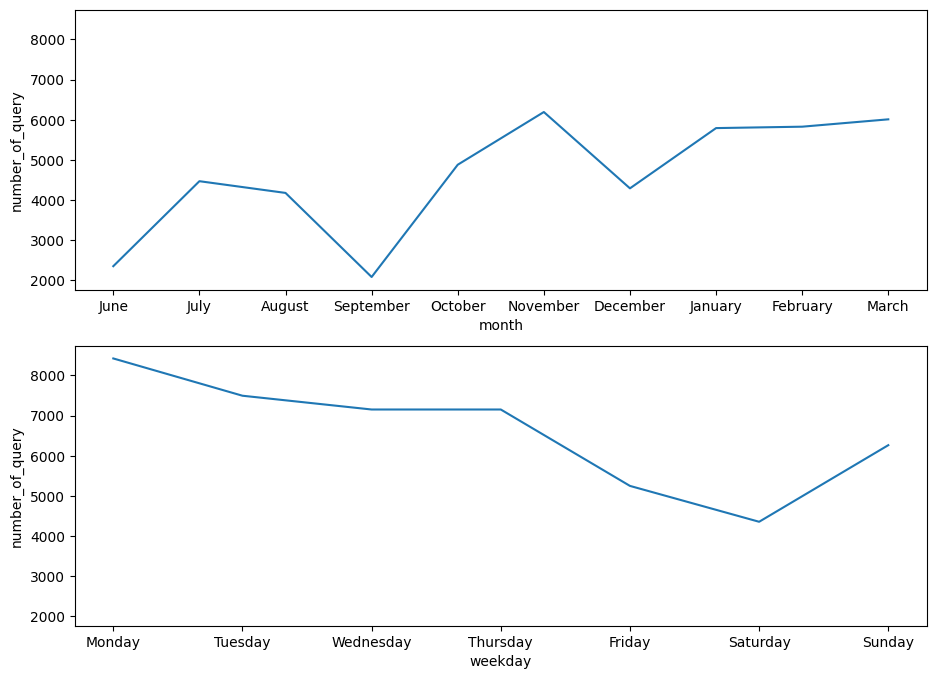

In [18]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharey=True,  figsize=(11, 8))

sns.lineplot(data=allarticles_month, x='month',y='number_of_query', ax=ax0)
sns.lineplot(data=allarticles_weekday, x='weekday',y='number_of_query', ax=ax1)

plt.show()

In [19]:
#группировка количества запросов по часам для проверки количества запросов в час, 
#фильтрация количества запросов по 75 квантилю, так как необходимо видеть самые загруженные часы 
articles_time = allarticles_df.groupby('created_at', as_index=False)\
                              .agg({'id':'count'}).rename(columns={'id':'number_of_query'})\
                              .query('number_of_query > 12')

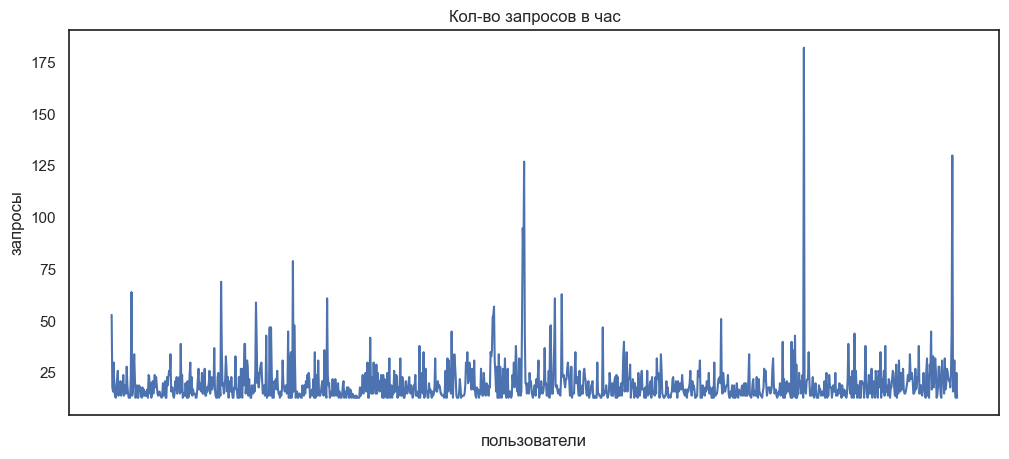

In [65]:
ax = sns.lineplot(data=articles_time, x='created_at',y='number_of_query')
sns.set(rc = {'figure.figsize':(12, 5)})
ax.set(title='Кол-во запросов в час')
ax.set(xlabel='пользователи', ylabel='запросы')
ax.set(xticklabels=[]) 
sns.set_style('white')

plt.show()

На графике видно, что пока нет слишком большого количества запросов в час, но в будущем с ростом платформы необходимо отслеживать наиболее загруженное время и обеспечить бесперебойность работы так, что при увеличении нагрузки производительность вашего приложения не снизится.

Проверю, какие языки используются для запросов.

In [21]:
users_lang = users_df.groupby('lang', as_index=False)\
                    .agg({'user_id':'nunique'})\
                    .rename(columns={'user_id':'number_of_users'})\
                    .query('number_of_users >= 20 & lang != "ru"')

Отфильтрую данные по количеству пользователей (больше 20 пользователей с одним языком) и уберу из выводы русский язык, так как количество пользователей с русским языком значительно превышает все остальные. 

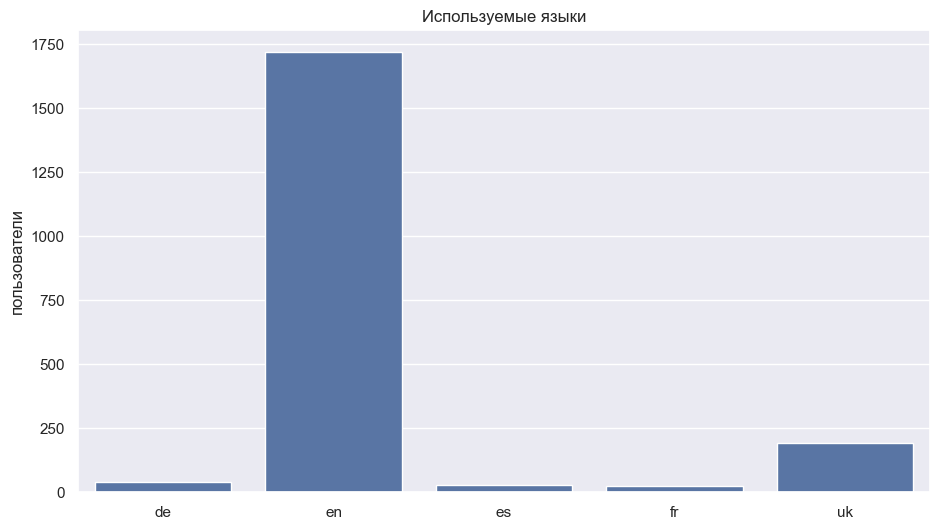

In [70]:
ax = sns.barplot(data=users_lang, x='lang', y='number_of_users')
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize':(11, 6)})
ax.set(title='Используемые языки')
ax.set(xlabel='', ylabel='пользователи')

plt.show()

Помимо русского языка, за пол года так же было более 20 человек с французским, испанским, немецким и более значительная часть с украинским и английским.

Так же проверю пиковые часы с регистрацией пользователей, что так же может быть нагрузкой на платформу. 

In [23]:
registration_time = users_df.groupby('created_at')\
                              .agg({'user_id':'nunique'})\
                            .rename(columns={'user_id':'number_of_users'})\
                            .query('number_of_users > 30')

In [24]:
registration_time.describe()

,number_of_users
count,6.000000
mean,827.166667
std,1913.516074
min,32.000000
25%,39.000000
50%,42.500000
75%,67.000000
max,4733.000000


In [25]:
users_df.groupby('created_at')\
        .agg({'user_id':'nunique'})\
        .query('created_at == "2023-06-16 18"')

,user_id
created_at,
2023-06-16 18,4733


In [26]:
users_df.is_blocked_bot.sum()

351

В среднем, нет большого количества новых пользователей за один час, кроме одного пика в 4733 новых пользователей (кторые не являются ботами).

3. Выделение ключевых метрик и их анализ 

Для анализа данных о пользовательском взаимодействии с платформой за последние шесть месяцев мною были выбраны следующие метрики:<br>
<br>

**MAU** - число активных пользователей за месяц<br>
**CR** из запроса в скачивание статьи<br>
**коэффициент вовлеченности** - процент пользователей, которые совершают запросы спустя 30 дней после регистрации и процент пользователей, которые совершают больше 9 запросов за пол года<br>



In [27]:
statistics_df['created_at'] = pd.to_datetime(statistics_df['created_at'])

In [28]:
#добавяю 11 дней к числу, чтобы далее сгруппировать по целым месяцам, изначально данные в таблице
#начинаются и заканчиваются 21 числа месяца
statistics_df['new_date'] = statistics_df['created_at'] + pd.Timedelta(days=11)
statistics_df['month'] = statistics_df['new_date'].dt.month_name()

In [29]:
mau= statistics_df.groupby('month', as_index=False).agg({'new_users_24':'sum'})
mau = mau.drop(index=0)
mau_months = ['September', 'October', 'November', 'December', 'January', 'February', 'March']
mau['month'] = pd.Categorical(mau['month'], categories=mau_months, ordered=True)
mau = mau.sort_values('month')

[Text(0.5, 0, ''), Text(0, 0.5, 'кол-во активных пользователей')]

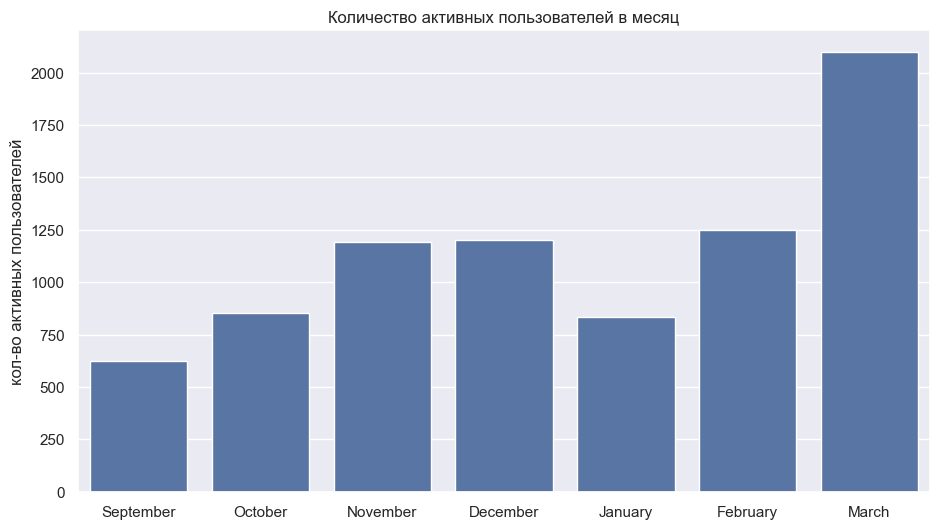

In [71]:
ax = sns.barplot(data=mau, x='month', y='new_users_24')
sns.set(rc = {'figure.figsize':(11, 5)})
ax.set(title='Количество активных пользователей в месяц')
ax.set(xlabel='', ylabel='кол-во активных пользователей')

По графику видно, что количество активных пользователей растет, наблюдается только спад в январе, что может быть связано с долгими выходными, когда люди в меньшей степени проявляют активность в научной сфере. 

In [31]:
#объединяю таблицы с данными о статьях и о пользователях для более подробного 
# изучения пользовательского опыта
users_activity = pd.merge(allarticles_df, users_df, how='left', on='user_id')

In [32]:
users_activity = users_activity.drop(columns=['#','is_user_source','user_name','name','surname','is_admin','lang'])\
                                .sort_values(['user_id','created_at_x'])

In [33]:
#создаю отдельную колонку с количеством запросов на каждого пользователя
users_activity['query_number'] = users_activity.groupby('user_id', as_index=False)['id']\
                                .transform('count')

In [34]:
users_activity_query = users_activity.drop_duplicates(subset='user_id',keep='first')

/var/folders/5y/_nt0712x2xz7hr7k68tjm0pc0000gn/T/ipykernel_55830/1862869853.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax = sns.lineplot(data=users_activity_query[users_activity['query_number']!=9947], x='user_id', y='query_number')


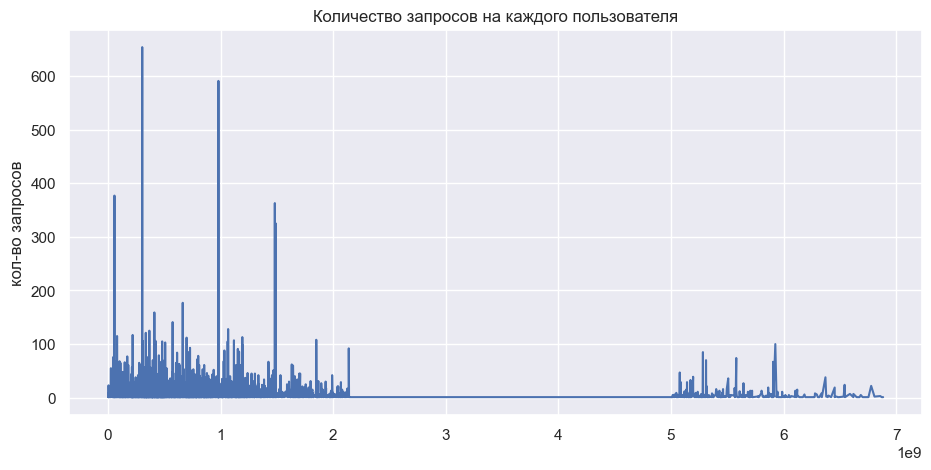

In [73]:
ax = sns.lineplot(data=users_activity_query[users_activity['query_number']!=9947], x='user_id', y='query_number')
ax.set(title='Количество запросов на каждого пользователя')
ax.set(xlabel='', ylabel='кол-во запросов')

plt.show()

In [36]:
#фильтрация данных по 25-процентному квантилю количества запросов
repeat_use_rate = round((((users_activity[users_activity['query_number']>=9]\
                           .user_id.nunique())/users_activity.user_id.nunique())*100),2)
print(f'{repeat_use_rate}% пользователей совершили более 9 запросов')

17.06% пользователей совершили более 9 запросов


In [37]:
#добавляю отдельный столбец с датой последнего запроса пользователя
users_activity['latest_query'] = users_activity.groupby('user_id', as_index=False)\
                                ['created_at_x'].transform('max')

In [38]:
#подсчет количества дней с момента регистрации пользователя до его последнего запроса
users_activity['duration'] = pd.to_datetime(users_activity.latest_query) - pd.to_datetime(users_activity.created_at_y)

In [39]:
use_duration_rate = round(((users_activity.query('duration > "30 days"')['user_id']\
                            .nunique())/(users_activity.user_id.nunique())*100),2)
print(f'{use_duration_rate}% пользователей совершали запросы спустя 30 дней после регистрации')

40.82% пользователей совершали запросы спустя 30 дней после регистрации


In [40]:
#создаю отдельный столбец с количеством загрузок статьей за 24 часа
statistics_df['downloads_24'] = statistics_df['count_downloads'].diff()

In [41]:
#вычисляю конверсию в загрузку от общего числа запросов за 24 часа
statistics_df['download_conversion'] = round(((statistics_df.downloads_24/statistics_df.all_query_24)*100),2)

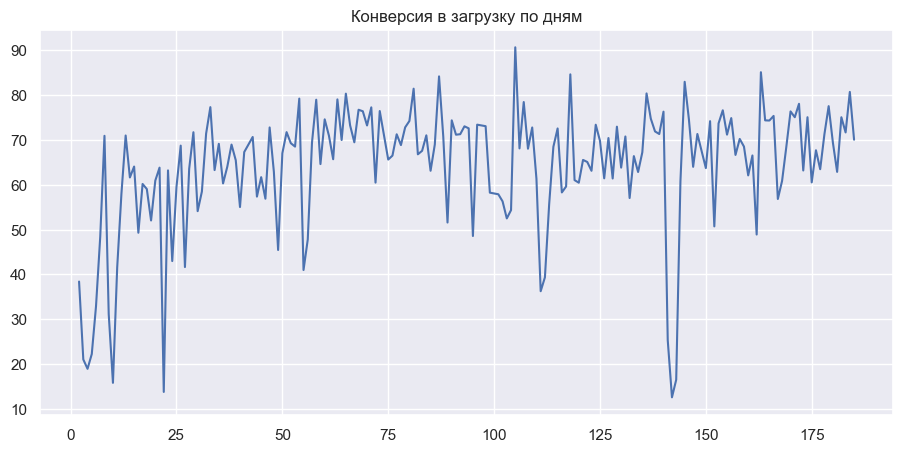

In [74]:
ax = sns.lineplot(data=statistics_df[statistics_df['download_conversion']<100], x='id', y='download_conversion')

ax.set(title='Конверсия в загрузку по дням')
ax.set(xlabel='', ylabel='')

plt.show()

4. **гипотеза**: наличие или отсутвие названия у статьи влияет на ее скачиваемость<br>
    Произведу вычисления и проверю статистическую значимость результатов для проверки гипотезы.  

In [43]:
articles = pd.merge(allarticles_df, articles_df, how='inner', on='article_id')

In [44]:
articles = articles.drop(['#_x','uuid','doi','date','container_title','type','ISSN','page','volume','#_y','issue','id','is_user_source'],axis=1)
articles = articles.rename(columns={'created_at_x':'article_created','created_at_y':'query_created'})
articles = articles[['article_id','title','author','article_created','updated_at','query_created','is_download','user_id']]
articles = articles.drop_duplicates(keep='first')

In [45]:
articles.shape

(44365, 8)

In [46]:
articles.article_id.nunique()

38786

In [47]:
articles = articles.drop_duplicates(subset='article_id',keep='first')

In [48]:
articles.isna().sum()

article_id            0
title              1491
author             2402
article_created       0
updated_at            0
query_created         0
is_download           0
user_id               0
dtype: int64

In [49]:
articles_downloaded = articles.loc[articles['is_download']==True]

In [50]:
articles_downloaded.isna().sum()

article_id           0
title              194
author             504
article_created      0
updated_at           0
query_created        0
is_download          0
user_id              0
dtype: int64

In [51]:
articles_downloaded.shape

(19512, 8)

In [52]:
articles_not_downloaded = articles.loc[articles['is_download']==False]

In [53]:
articles_not_downloaded.shape

(19274, 8)

In [54]:
articles_not_downloaded.isna().sum()

article_id            0
title              1297
author             1898
article_created       0
updated_at            0
query_created         0
is_download           0
user_id               0
dtype: int64

Так как тестируется биомиальная случайная величина (загрузка - есть/нет), выборки независимые, а величина выборки достаточно велика, для проверки гипотезы будет использоваться z-test.

In [55]:
title_group_A = articles_downloaded['title'].notna().sum()
total_group_A = articles_downloaded['article_id'].count()
title_group_B = articles_not_downloaded['title'].notna().sum()
total_group_B = articles_not_downloaded['article_id'].count()
z_score, p_value = sm.stats.proportions_ztest([title_group_A, title_group_B], [total_group_A, total_group_B])
print("Z-score:", z_score)
print("p-value:", p_value)

Z-score: 29.372747399571722
p-value: 1.2243661785671158e-189


Так как p-value значительно ниже 0.05, можно отвергнуть нулевую гипотезу о том, что разницы в скачиваниях между группами нет. 

5. **гипотеза**: количество не найденных статей негативно влияет на заинтересованность пользователя продолжать поиск через платформу  

In [56]:
statistics_df['date'] = pd.to_datetime(statistics_df['created_at']).dt.strftime('%y-%m-%d')

In [57]:
not_found_df = statistics_df.drop(['#','id','user_count','all_query','founded','count_downloads','install','install_24','unfounded','created_at','new_date','month','download_conversion'], axis=1)

In [58]:
#вычисляю пропорцию ненайденных статей от общего числа запросов в день
not_found_df['notfound_proportion'] = (not_found_df.unfounded_24 * 100)/not_found_df.all_query_24

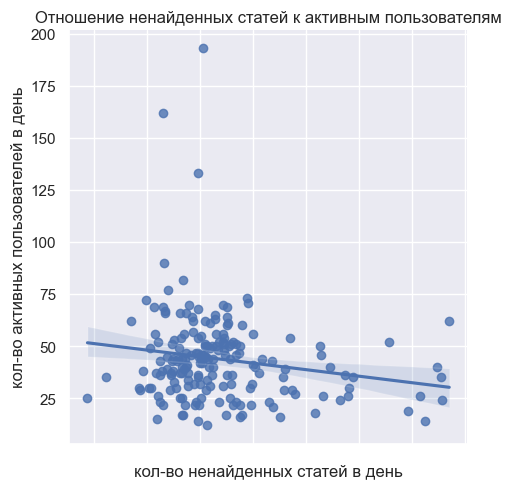

In [63]:
ax = sns.lmplot(data=not_found_df, x='notfound_proportion', y='new_users_24')
ax.set(title='Отношение ненайденных статей к активным пользователям')
ax.set(xlabel='кол-во ненайденных статей в день', ylabel='кол-во активных пользователей в день')
ax.set(xticklabels=[]) 
plt.show()

На графике видна обратнопропорциональная зависимость - чем больше пропорция ненайденных статей, тем меньше новых пользователей. Конечно, нельзя с полной увереностью утверждать, что эта зависимость точно существует, возможно влияют некоторые другие факторы, но стоит учесть. 